In [1]:
import numpy as np
import pandas as pd
import gudhi as gd
import sys
import matplotlib.pyplot as plt
import networkx as nx
from ripser import Rips
import pickle
import os
import persim
from sklearn.manifold import TSNE
from matplotlib.pyplot import figure
from sklearn.preprocessing import normalize
from Topo import Topo
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.optimize import curve_fit

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
netlist_name = 'jpeg_300_off_low_GENUS'

with open('d_dict.pkl', 'rb') as f:
    new_d_dict = pickle.load(f)

with open('delay_dict.pkl', 'rb') as f:
    delay_dict = pickle.load(f)
    
s_inst = np.load("s_inst.npy", allow_pickle=True)

G = nx.read_gpickle(f"{netlist_name}.gpickle")

sn_lst = [32524, 52754, 16900, 23764, 38509, 39949, 67723, 24287, 12000, 51153]

s_inst = s_inst.tolist()

G.remove_edges_from(list(nx.selfloop_edges(G)))

col_row = np.load(f"/home/zluo/output/{netlist_name}.npy")

col = col_row[0]
row = col_row[1]
edgs = np.array([col, row]).T

with open("net_dict/jpeg_300_off_low_GENUSnet.pkl", "rb") as f:
    net_dict = pickle.load(f)

In [4]:
netlist_name = 'jpeg_300_off_low_GENUS_o'

with open('delay_dict_jpeg_300_off_low_GENUS_o.pkl', 'rb') as f:
    delay_dict = pickle.load(f)
    
with open('jpeg_300_off_low_GENUS_oinst.pkl', 'rb') as f:
    dinst = pickle.load(f)

G = nx.read_gpickle(f"{netlist_name}.gpickle")

col_row = np.load(f"{netlist_name}.npy")

col = col_row[0]
row = col_row[1]
edgs = np.array([col, row]).T

with open(f"{netlist_name}net.pkl", "rb") as f:
    net_dict = pickle.load(f)

In [5]:
start_pt_dict = {net_dict[net][0][0]:net for net in net_dict.keys()}

with open("jpeg_300_off_low_GENUS_WL.rpt", "r") as f:
    ground_truth = [val[:-1].split(", ") for val in f.readlines()][1:]
    
wirelength = dict(ground_truth)

w_dict = dict()

for key in start_pt_dict.keys():
    net = start_pt_dict[key]
    
    try:
        w_dict[key] = float(wirelength[net])
    
    except:
        continue
        
G = G.subgraph(list(w_dict.keys()))

In [9]:
master_dict[dbInst.getConstName()] = dbInst.getMaster().getConstName()

549

In [11]:
for file in os.listdir("asap7_lib"):
    print("asap7_lib/" + file)

asap7_lib/asap7sc7p5t_20_170205_R_TT.lib
asap7_lib/asap7sc7p5t_20_170205_SRAM_SS.lib
asap7_lib/asap7sc7p5t_20_170205_SL_SS.lib
asap7_lib/asap7sc7p5t_20_170205_SL_FF.lib
asap7_lib/asap7sc7p5t_20_170205_SRAM_FF.lib
asap7_lib/.ipynb_checkpoints
asap7_lib/asap7sc7p5t_20_170205_L_TT.lib
asap7_lib/asap7sc7p5t_20_170205_R_FF.lib
asap7_lib/asap7sc7p5t_20_170205_L_SS.lib
asap7_lib/asap7sc7p5t_20_170205_SRAM_TT.lib
asap7_lib/asap7sc7p5t_20_170205_SL_TT.lib
asap7_lib/asap7sc7p5t_20_170205_L_FF.lib


In [6]:
nx.set_node_attributes(G, w_dict, "wirelength")
nx.set_node_attributes(G, dict(G.in_degree()), "in_degree")
nx.set_node_attributes(G, dict(G.out_degree()), "out_degree")
nx.set_node_attributes(G, delay_dict, "long_path")
nx.set_node_attributes(G, new_d_dict, "delay")
#nx.set_node_attributes(G, dinst, "inst_name")

In [41]:
to_add_start = max(G.nodes)

In [42]:
G = nx.DiGraph(G)
nx.is_frozen(G)

False

In [43]:
nodelist = list(G.nodes)

In [44]:
for node in nodelist:
    to_add_start += 1
    G.add_node(to_add_start, wirelength=G.nodes[node]['wirelength'], out_degree=G.nodes[node]['out_degree'])
    G.add_edge(node, to_add_start)
    for sub_node in G.neighbors(node):
        G.add_edge(to_add_start, sub_node)

In [45]:
G.number_of_nodes()

159408

In [46]:
y = []
num = []

for node in G:
    wl = G.nodes[node]['wirelength']
    in_d = G.nodes[node]['in_degree']
    out_d = G.nodes[node]['out_degree']
    long_path = G.nodes[node]['long_path']
    
    num.append([in_d, out_d, long_path])
    y.append(wl)

KeyError: 'in_degree'

In [37]:
# Test
y = []
num = []

for node in G:
    wl = G.nodes[node]['wirelength']
    in_d = G.nodes[node]['in_degree']
    out_d = G.nodes[node]['out_degree']
    long_path = G.nodes[node]['long_path']
    
    num.append([in_d, out_d, long_path])
    y.append(wl)

In [33]:
y_train = y
num_train = num

In [38]:
y_test = y
num_test = num

In [40]:
#encoder_cat = OneHotEncoder().fit(cat_train)
#encoded_train = encoder_cat.transform(cat_train).toarray().tolist()
#encoded_test = encoder_cat.transform(cat_test).toarray().tolist()                                   

NameError: name 'encoder_cat' is not defined

In [41]:
encoder_num = StandardScaler().fit(num_train)
encoded_train_num = encoder_num.transform(num_train).tolist()
encoded_test_num = encoder_num.transform(num_test).tolist()   

In [46]:
X = []
for idx in range(len(encoded_train)):
    X.append(encoded_train[idx] + encoded_train_num[idx])

[[-1.6230688015451142, -0.0841706496119953, -0.6977697269932497],
 [-1.6230688015451142, -0.0841706496119953, -0.9252695114764161],
 [-1.6230688015451142, -0.0841706496119953, -0.8797695545797829],
 [1.462593412252699, -0.030830911791207605, -0.825169606303823],
 [-0.5945147302791765, -0.0841706496119953, -0.6340697873379632],
 [1.462593412252699, -0.030830911791207605, -0.6431697787172898],
 [0.4340393409867613, -0.030830911791207605, -0.6522697700966165],
 [-0.5945147302791765, -0.030830911791207605, -0.8160696149244963],
 [0.4340393409867613, 0.0758485638503678, -0.8069696235451697],
 [1.462593412252699, 0.1291883016711555, -0.6704697528552698],
 [0.4340393409867613, 0.0758485638503678, -0.6613697614759431],
 [0.4340393409867613, 0.0758485638503678, -0.6613697614759431],
 [0.4340393409867613, 0.0758485638503678, -0.6613697614759431],
 [0.4340393409867613, 0.0758485638503678, -0.6613697614759431],
 [0.4340393409867613, 0.022508826029580094, -0.7250697011312297],
 [-1.6230688015451142

In [437]:
X = []
for idx in range(len(encoded_test)):
    X.append(encoded_test[idx] + encoded_test_num[idx])

In [48]:
np.save("train_X.npy", encoded_train_num)
np.save("test_X.npy", encoded_test_num)

In [438]:
idx_dict = dict()
nodelist = list(G.nodes)
for idx in range(len(nodelist)):
    idx_dict[nodelist[idx]] = idx
    
edgs = [[idx_dict[tp[0]], idx_dict[tp[1]]] for tp in list(G.edges)]

In [433]:
np.save("train_X.npy", X)
np.save("train_y.npy", y_train)
np.save("edge_index_train.npy", edgs)

In [434]:
len(X), len(y_train), len(edgs)

(51442, 51442, 81176)

In [439]:
np.save("test_X.npy", X)
np.save("test_y.npy", y_test)
np.save("edge_index_test.npy", edgs)

In [440]:
len(X), len(y_test), len(edgs)

(79704, 79704, 147612)

In [34]:
all_data = topo.distance_expansion(shortest=False)
func = lambda r,a,b: a*(r**(b))
fig, axes = plt.subplots(2, 5, figsize=(15*1.5, 5*1.5))
alpha = []
beta = []

for idx in range(10):
    xdata = []
    ydata = []

    xdata += all_data[idx][0]
    ydata += all_data[idx][1]

    xdata = np.array(xdata)[5:]
    ydata = np.array(ydata)[5:]
    
    p, c = curve_fit(func,  xdata,  ydata)
    a, b = p
    axes[(idx)//5, (idx)%5].plot(xdata, ydata, 'b-', label=f'{sn_lst[idx]}')
    axes[(idx)//5, (idx)%5].plot(xdata, func(xdata, a, b), 'r-', label=f'fit: N_v = {np.round(a, 2)}*(r^{np.round(b, 2)})')
    axes[(idx)//5, (idx)%5].legend()
    alpha.append(a)
    beta.append(b)

Text(0.5, 1.0, 'Distribution of alpha')

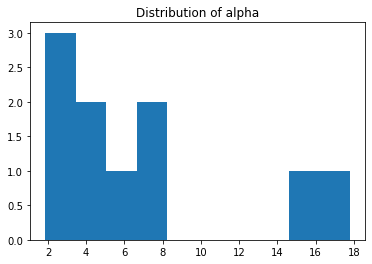

In [21]:
plt.hist(alpha)
plt.title("Distribution of alpha")

Text(0.5, 1.0, 'distribution of beta')

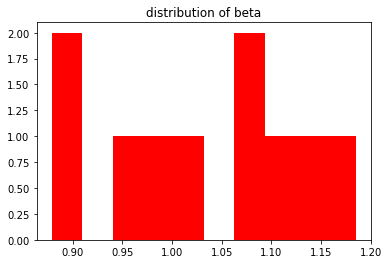

In [22]:
plt.hist(beta, color="red")
plt.title("distribution of beta")

Generating Hierarchical Clustering Dendrogram and Similarity Matrix


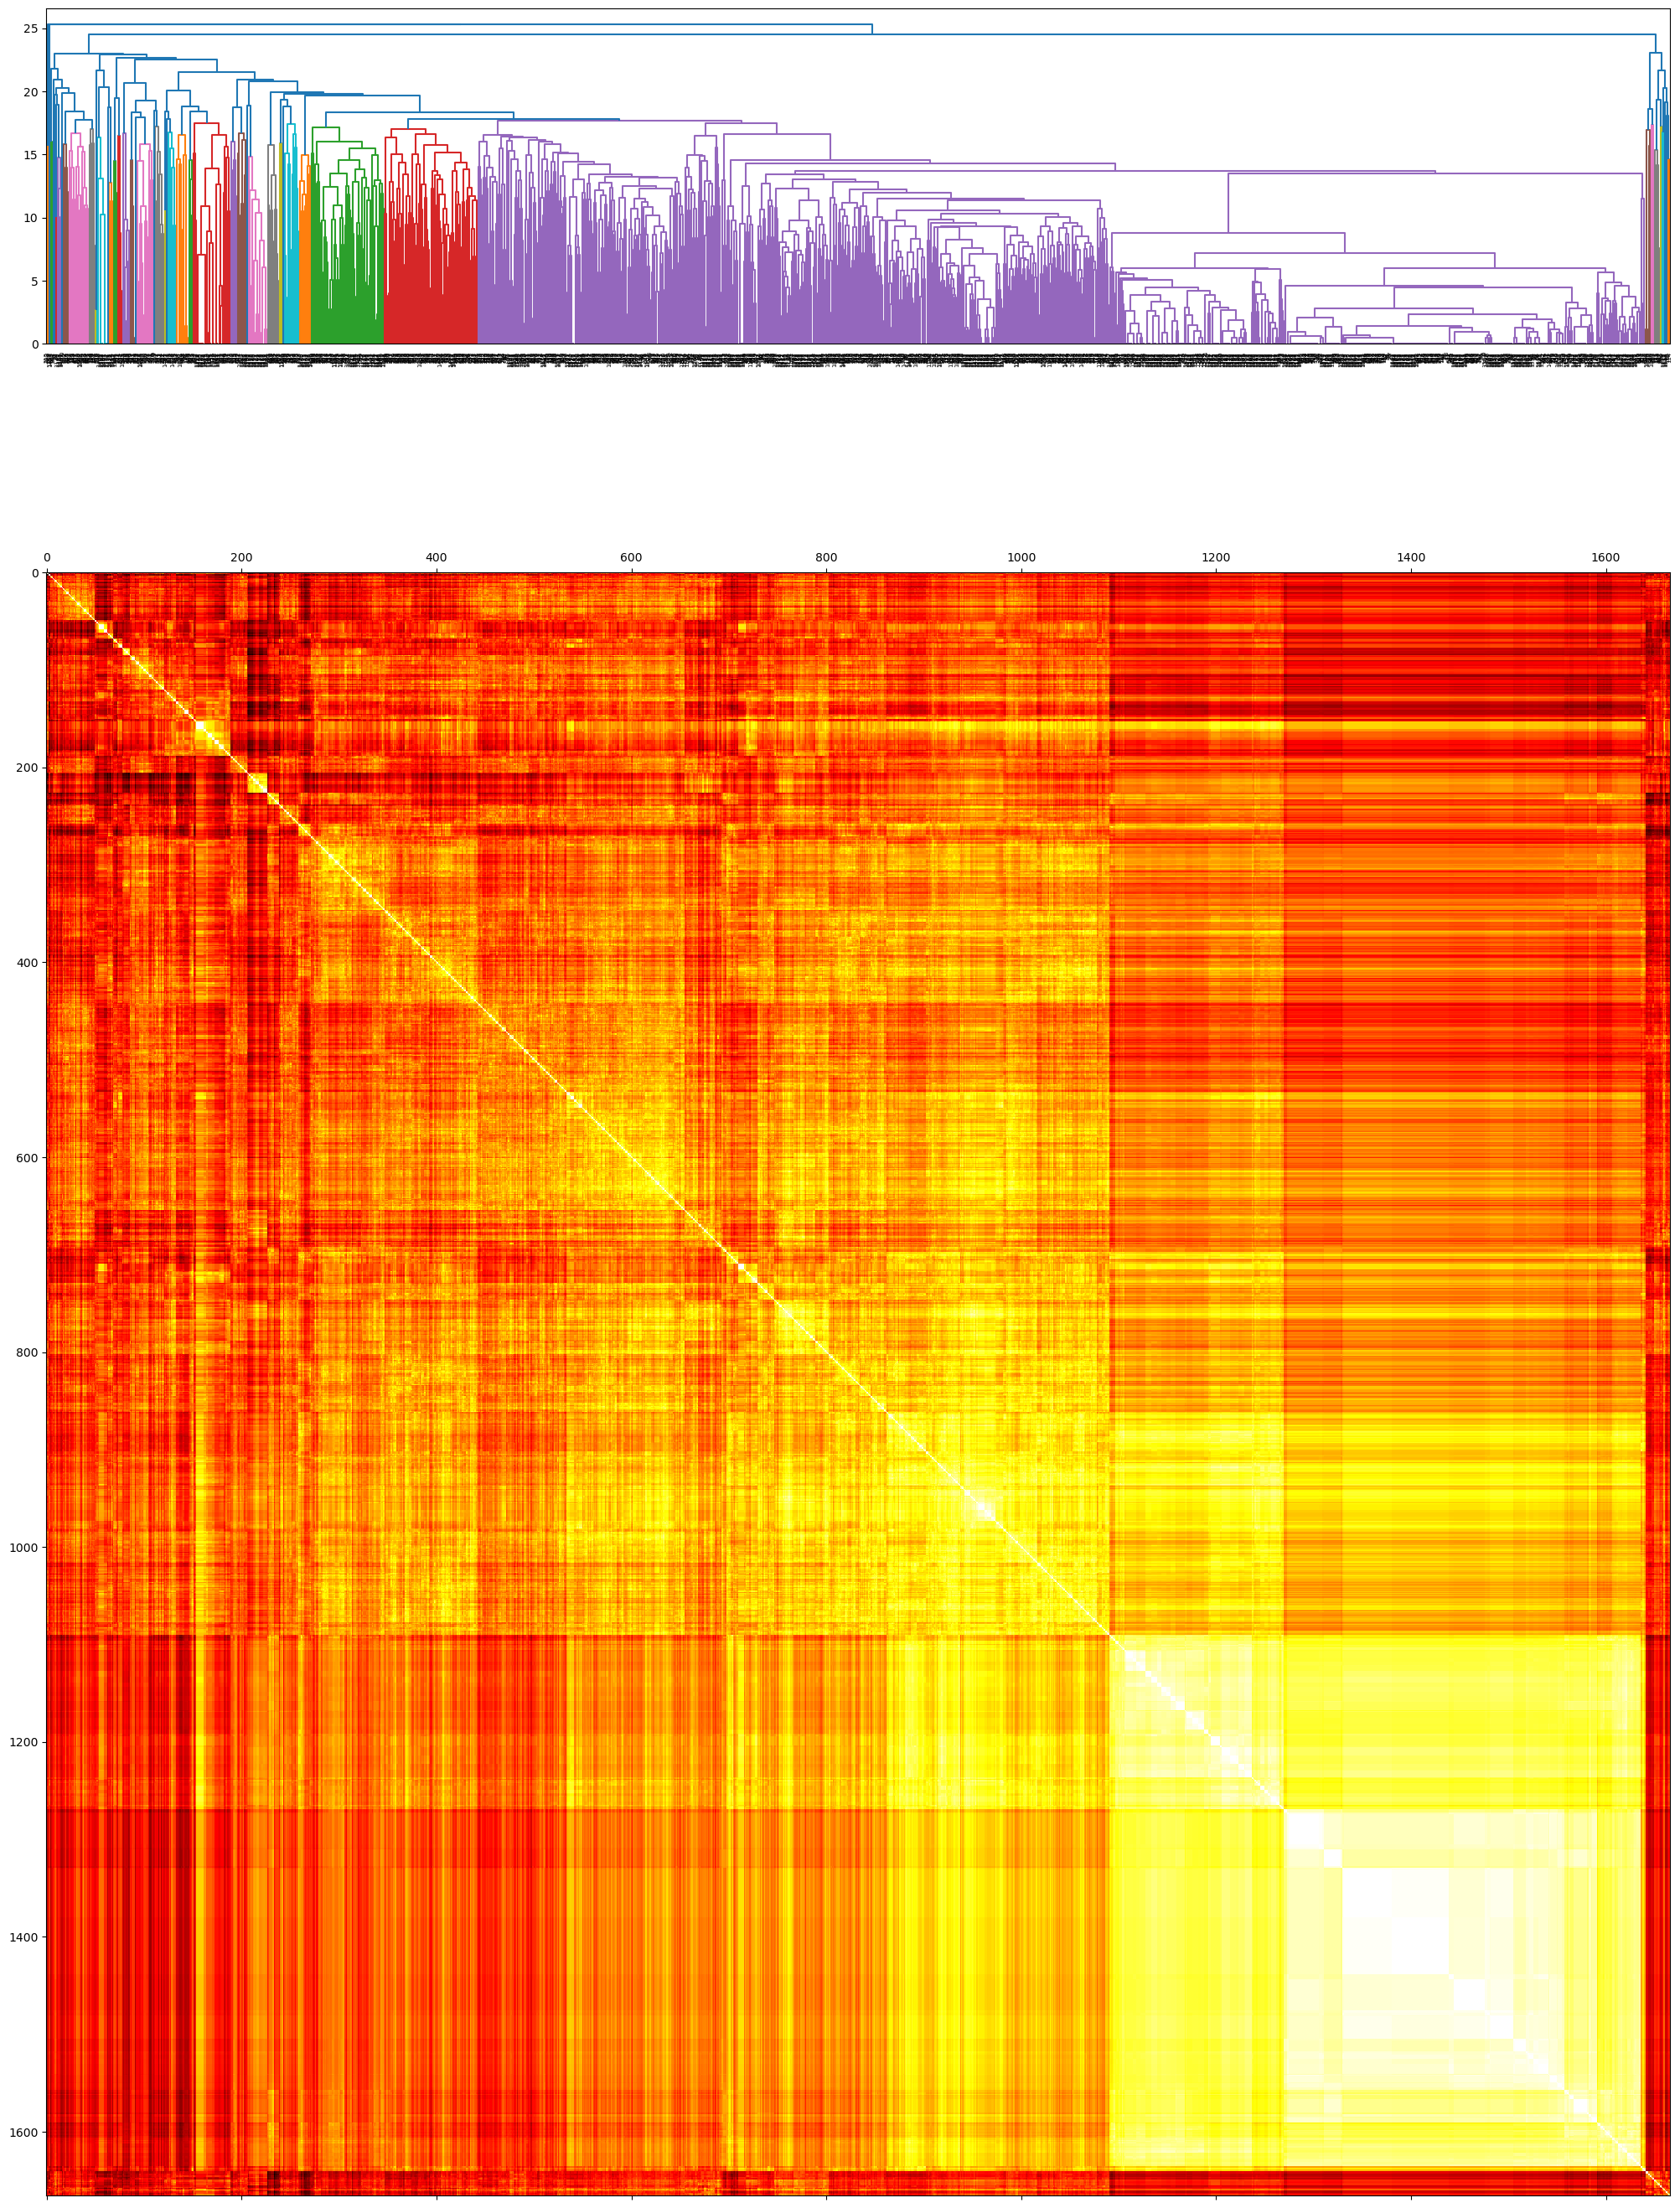

In [22]:
idx_lst = topo.clustering_analysis("b_symm_0.npy", 80, "b_symm_0.png")

In [20]:
files = np.array(os.listdir("/home/zluo/new_chip_design/net_dgms/"))
f_d = {files[idx]:idx for idx in range(len(files))}
paths = np.load("paths.npy")

In [5]:
topo = Topo(G, edgs, delay_dict, s_inst, sn_lst)

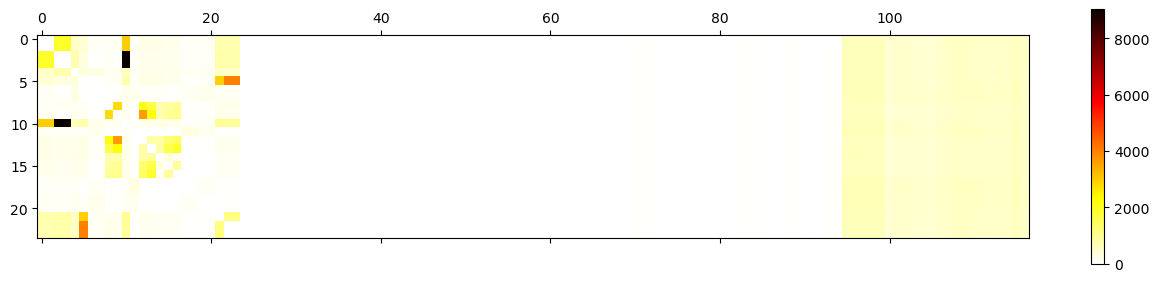

In [227]:
plt.matshow(X[:24,:], cmap=plt.cm.hot_r)
plt.colorbar()

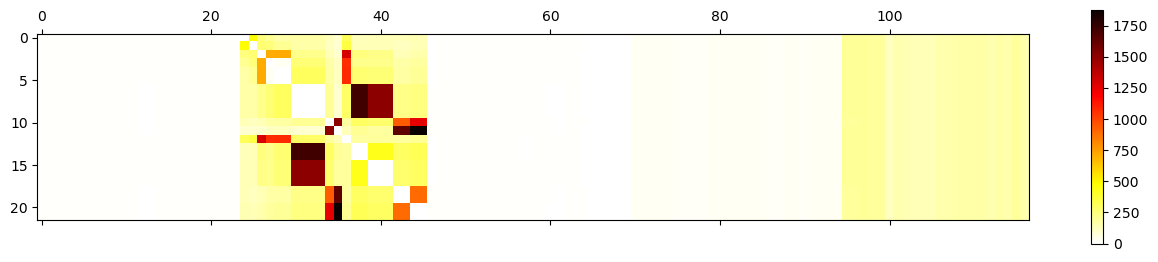

In [185]:
plt.matshow(X[24:46,:], cmap=plt.cm.hot_r)
plt.colorbar()

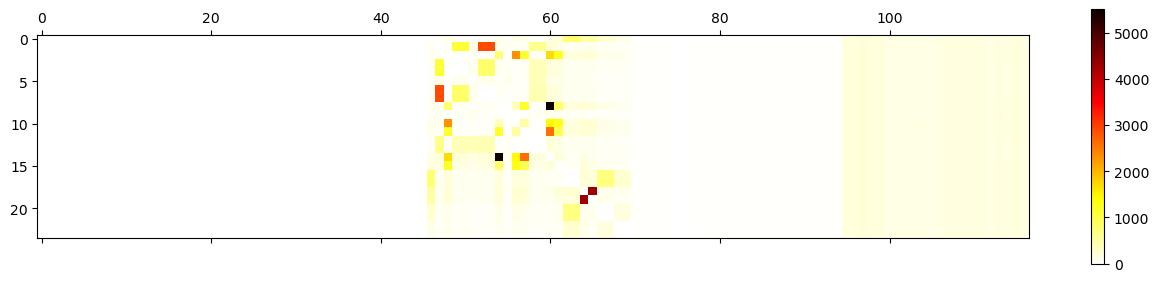

In [186]:
plt.matshow(X[46:70,:], cmap=plt.cm.hot_r)
plt.colorbar()

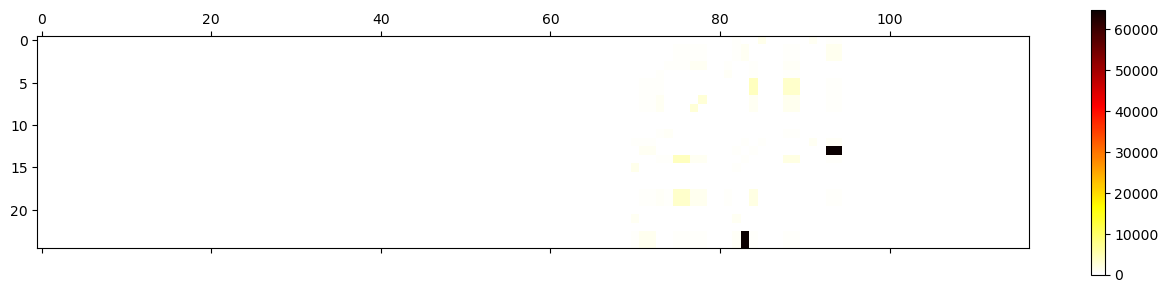

In [187]:
plt.matshow(X[70:95,:], cmap=plt.cm.hot_r)
plt.colorbar()

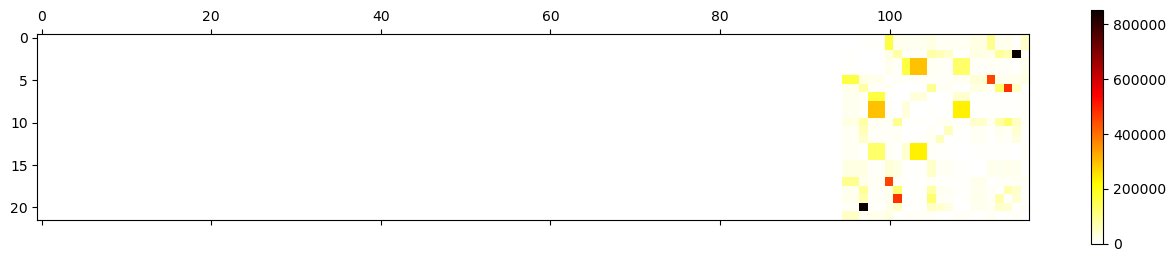

In [188]:
plt.matshow(X[95:,:], cmap=plt.cm.hot_r)
plt.colorbar()

In [40]:
df = pd.read_csv("gin.log", header=None)
idx = df[0]
train_loss = df[1]
test_loss = df[2]
train_acc = df[3]
test_acc = df[4]
idx_max = test_acc.idxmax()
[train_loss[idx_max], test_loss[idx_max], train_acc[idx_max], test_acc[idx_max]]

[1.610717744662844, 1.6172695318857828, 0.1839080459770115, 0.3333333333333333]

Text(0.5, 1.0, 'training accuracy')

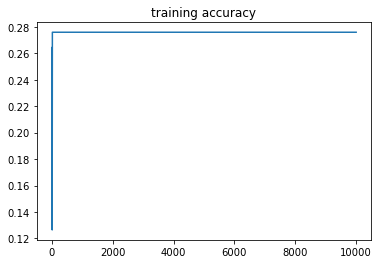

In [41]:
plt.plot(idx, train_acc)
plt.title("training accuracy")

Text(0.5, 1.0, 'test accuracy')

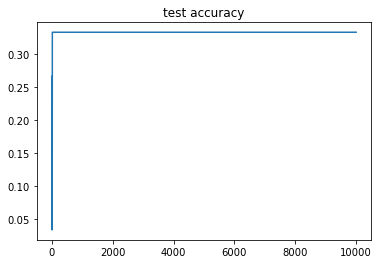

In [42]:
plt.plot(idx, test_acc)
plt.title("test accuracy")

In [170]:
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)

In [43]:
all_test = [0.43, 0.43, 0.44, 0.36, 0.63, 0.37, 0.7, 0.77, 0.87]
all_train = [0.52, 0.48, 0.54, 0.37, 0.8, 0.4, 0.87, 0.91, 0.89]
all_labels = "stats, eigs, stats+eigs, un_pd_0, n_pd_0, un_pd_1, n_pd_1, GCN, GAT".split(", ")

([<matplotlib.axis.YTick at 0x2b80ccf32910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

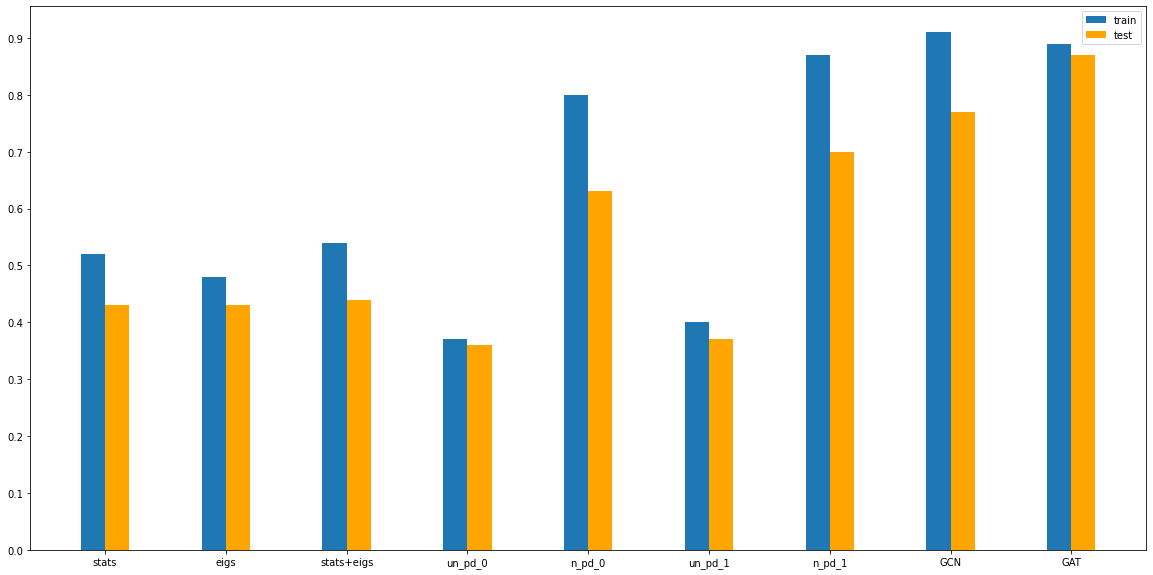

In [50]:
plt.figure(figsize=(20, 10))
plt.bar(np.array([idx for idx in range(9)]) - 0.1, np.array(all_train), align='center', width=0.2) 
plt.bar([idx for idx in range(9)], np.array(all_test), align='edge', width=0.2, color="orange") 
plt.legend(["train", "test"])
plt.xticks(ticks=[idx for idx in range(9)], labels=all_labels)
plt.yticks(ticks=[idx*0.1 for idx in range(10)])

In [5]:
X = np.load("eig_all.npy")
X_add = np.load("new_X.npy")

In [47]:
X = np.load("new_X.npy")

In [26]:
path_lst = []
for f in paths:
    path_lst.append(f.split("_")[:-1])

encoder = OrdinalEncoder()
labels = encoder.fit_transform(path_lst)
encoder.categories_
t_f = np.array([int(lst[1]) for lst in labels])

In [49]:
all_scores = []
train_scores = []
y = np.array(t_f)
max_acc = 0
max_idx = None
for i in range(1000):
    idx_lst = [idx for idx in range(len(X))]
    idx_lst = np.random.choice(idx_lst, size=len(X), replace=True)
    train_idx = idx_lst[:int(len(X)*0.75)]
    test_idx = idx_lst[int(len(X)*0.75):]
    
    X_train = X[train_idx]
    X_test = X[test_idx]
    
    #X_add_train = X_add[train_idx]
    #X_add_test = X_add[test_idx]
    
    #X_train = np.concatenate([X_train, X_add_train], axis=1)
    #X_test = np.concatenate([X_test, X_add_test], axis=1)
    
    y_train = y[train_idx]
    y_test = y[test_idx]
    
    clf = make_pipeline(StandardScaler(), SVC())
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    tr_score = clf.score(X_train, y_train)
    
    if score > max_acc:
        max_acc = score
        max_idx = (train_idx, test_idx)
        
    train_scores.append(tr_score)
    all_scores.append(score)

0.43333333333333335


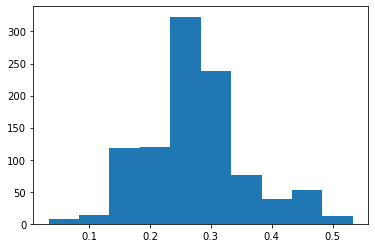

In [50]:
plt.hist(all_scores)
print(np.percentile(all_scores, 95))

0.5172413793103449


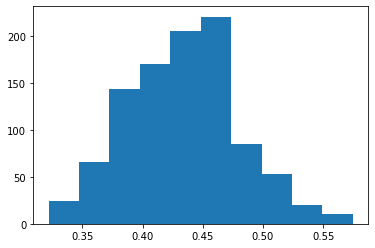

In [51]:
plt.hist(train_scores)
print(np.percentile(train_scores, 95))

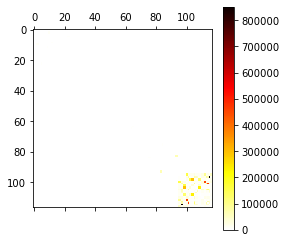

In [46]:
X = topo.show_matrix("b_symm_1_nets.npy", [f_d[f] for f in paths], normalize_path="o_lst.npy")

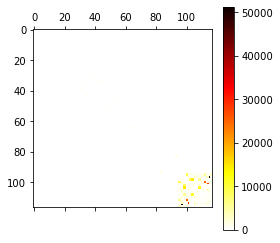

In [80]:
X_add = topo.show_matrix("b_symm_0_nets.npy", [f_d[f] for f in paths], normalize_path="o_lst.npy")

In [37]:
X_add = np.load("new_X.npy")
X_add_2 = np.load("eig_all.npy")

In [41]:
all_scores = []
train_scores = []
y = np.array(t_f)
max_acc = 0
max_idx = None
for i in range(1000):
    idx_lst = [idx for idx in range(len(X))]
    idx_lst = np.random.choice(idx_lst, size=len(X), replace=True)
    train_idx = idx_lst[:int(len(X)*0.75)]
    test_idx = idx_lst[int(len(X)*0.75):]
    
    X_train = X[train_idx,:][:, train_idx] 
    #X_add_train = X_add[train_idx,:][:, train_idx] 
    X_add_train = X_add[train_idx]
    X_test = X[test_idx,:][:, train_idx]
    #X_add_test = X_add[test_idx,:][:, train_idx]
    X_add_test = X_add[test_idx]
    
    X_add_train_2 = X_add_2[train_idx]
    X_add_test_2 = X_add_2[test_idx]
    
    
    X_train = np.concatenate([X_train, X_add_train, X_add_train_2], axis=1)
    X_test = np.concatenate([X_test, X_add_test, X_add_test_2], axis=1)
    
    y_train = y[train_idx]
    y_test = y[test_idx]
    
    clf = make_pipeline(StandardScaler(), SVC())
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    tr_score = clf.score(X_train, y_train)
    
    if score > max_acc:
        max_acc = score
        max_idx = (train_idx, test_idx)
        
    train_scores.append(tr_score)
    all_scores.append(score)

0.43333333333333335
0.5666666666666667


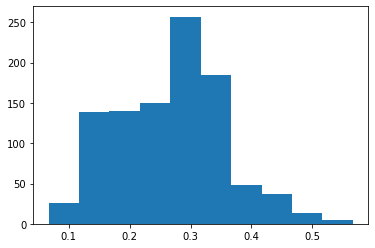

In [19]:
plt.hist(all_scores)
print(np.percentile(all_scores, 95))

0.4942528735632184


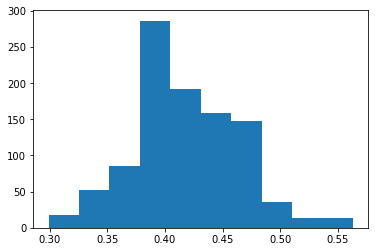

In [20]:
plt.hist(train_scores)
print(np.percentile(train_scores, 95))

In [4]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(87, 32),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(32, 5),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [146]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, stats, eigen, pd, labels):
        'Initialization'
        self.stats = torch.tensor(stats, dtype=torch.float)
        self.eigen = torch.tensor(eigen, dtype=torch.float)
        self.pd = torch.tensor(pd, dtype=torch.float)
        self.labels = torch.tensor(labels, dtype=torch.float)

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.stats)

    def __getitem__(self, index, feat = 2):
        'Generates one sample of data'
        # Select sample
        if feat == 0:
            X = self.stats[index]
        # Load data and get label
        elif feat == 1:
            X = self.eigen[index]
        
        elif feat == 2:
            X = self.pd[index]
        
        y = self.labels[index]

        return X, y

In [174]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True
model = NeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = torch.nn.CrossEntropyLoss()

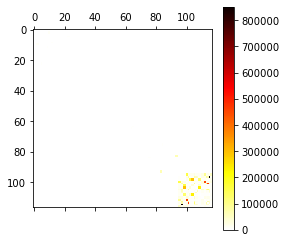

In [175]:
params = {'batch_size': 5,
          'shuffle': True}
max_epochs = 100

stats = np.load("new_X.npy")
eigen = np.load("eig_all.npy")
pd = topo.show_matrix("b_symm_1_nets.npy", [f_d[f] for f in paths], normalize_path="o_lst.npy")
encoder = OneHotEncoder()
labels = encoder.fit_transform(np.array(t_f).reshape(-1, 1)).toarray()

In [176]:
training_set = Dataset(stats[train_idx], eigen[train_idx], pd[train_idx,:][:, train_idx] , labels[train_idx])
training_generator = torch.utils.data.DataLoader(training_set, **params)

validation_set = Dataset(stats[test_idx], eigen[test_idx], pd[test_idx,:][:, train_idx] , labels[test_idx])
validation_generator = torch.utils.data.DataLoader(validation_set, **params)

In [177]:
def train():
    model.train()

    for local_batch, local_labels in training_generator:  # Iterate in batches over the training dataset.
        out = model(local_batch)  # Perform a single forward pass.
        loss = criterion(out, local_labels)  # Compute the loss.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
    
    optimizer.zero_grad()  # Clear gradients.

def test(loader):
    model.eval()
    correct = 0
    for local_batch, local_labels in loader:  # Iterate in batches over the training/test dataset.
        out = model(local_batch)  
        pred = out.argmax(dim=1)
        y = local_labels.argmax(dim=1)
        correct += int((pred == y).sum())  # Check against ground-truth labels.
    return correct / len(loader.dataset) # Derive ratio of correct predictions.

In [181]:
for epoch in range(1, 100):
    train()
    train_acc = test(training_generator)
    test_acc = test(validation_generator)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch: 001, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 002, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 003, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 004, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 005, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 006, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 007, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 008, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 009, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 010, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 011, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 012, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 013, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 014, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 015, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 016, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 017, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 018, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 019, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 020, Train Acc: 0.3333, Test Acc: 0.3667
Epoch: 021, Train Acc: 0.3333, Test Acc:

In [24]:
X_embedded = TSNE(n_components=2, init='random').fit_transform(X_fil)
X_embedded.shape

/home/zluo/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('logisticregression', LogisticRegression(max_iter=5000))])

In [23]:
df = pd.DataFrame()
df['x'] = X_embedded.T[0]
df['y'] = X_embedded.T[1]
df['c'] = [sub_delay[node] for node in nodelist]

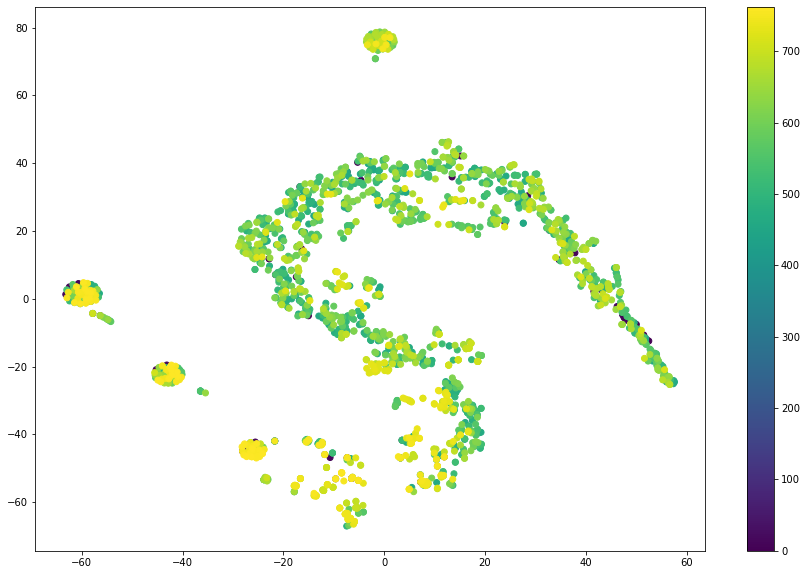

In [24]:
plt.figure(figsize=(15, 10))
plt.scatter(df.x, df.y, c=df.c)
plt.colorbar()

# Extract Features

In [22]:
f_lst = []
for file in os.listdir("feature_extract/verilog"):
    if file[:4] == "jpeg":
        f_lst.append(file[:-2])

In [ ]:
for f in f_lst:
    netlist_name = f
    
        #read in the data
    col_row = np.load(f"/home/zluo/output/{netlist_name}.npy")

    with open(f'/home/zluo/output/{netlist_name}bTerm.pkl', 'rb') as handle:
        dterm = pickle.load(handle)
        dterm = dict((v,k) for k,v in dterm.items())

    with open(f'/home/zluo/output/{netlist_name}inst.pkl', 'rb') as handle:
        dinst = pickle.load(handle)
        dinst = dict((v,k) for k,v in dinst.items())
        
    dall = {}
    dall.update(dterm)
    dall.update(dinst)
    
    dtype = {}
    for node in dall.keys():
        if node in dterm:
            dtype[node] = "bTerm"
        else:
            dtype[node] = "inst"
            
    # Building the Graph
    edgelist = []
    for edge in col_row.T:
        new_edge = (edge[0], edge[1])
        edgelist.append(new_edge)

    G = nx.DiGraph(edgelist)
    
    nx.set_node_attributes(G, dall, "inst_name")
    nx.set_node_attributes(G, dtype, "type")
    
    i = 0
    remained = []
    for node in G.nodes:
        inst = G.nodes[node]['inst_name']
        inst = inst.replace("\\", "")
        remained.append(inst)
        i += 1
            
    print(i)
    with open("run_all.txt", "w") as f:
        s_line = []
        for inst in remained:
            line = f"report_checks -through {inst} >> {netlist_name}.txt\n"
            s_line.append(line)
        f.writelines(s_line)
        
    filenames = ['sta_test.tcl', 'run_all.txt']
    with open(f'sta/final_sta_test_{netlist_name}.tcl', 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    if len(line.split()) > 0 and line.split()[0] == "read_verilog":
                        line = f"read_verilog {netlist_name}.v\n"
                    outfile.write(line)

In [2]:
#Test on several examples
#example1:
col_row = np.array([[1, 4], [1, 5], [2, 6], [2, 9], [3, 6], [4, 8], [4, 7], [5, 9], [8, 10], [9, 10], [6, 10]])
col_row = col_row.T

In [2]:
#example2:
col_row = np.array([[0, 1], [0, 2], [1, 3], [1, 4], [2, 6], [4, 5], [4, 6], [6, 5], [5, 7]])
col_row = col_row.T

In [ ]:
#example3:
col_row = np.array([[0, 1], [0, 2], [1, 3], [1, 4], [2, 6], [4, 5], [4, 6], [6, 5], [5, 7]])
col_row = col_row.T

In [3]:
col_row

array([[0, 0, 1, 1, 2, 4, 4, 6, 5],
       [1, 2, 3, 4, 6, 5, 6, 5, 7]])

In [4]:
###
col_row = col_row - 1

In [83]:

#nx.set_node_attributes(G, idx_d_dict, "delay")
#nx.set_node_attributes(G, idx_s_dict, "sequence")
nx.set_node_attributes(sub_G, )

In [101]:
s_d_dict = {}
for inst in d_dict.keys():
    if d_dict[inst] == '0.00':
        s_d_dict[inst] == "seq"

{'c': '0.00',
 'netwo': '0.00',
 'rle_rz4_size_reg[3]/C': '0.00',
 'rle_rz4_size_reg[3]/': '19.75',
 'rle_rz4_g3370': '7.70',
 'rle_rz4_drc_bufs3495': '8.66',
 'rle_rz4_drc_bufs3403': '7.64',
 'rle_rz4_sizeo_reg[3]': '0.00',
 'rle_rz4_size_reg[2]/C': '0.00',
 'rle_rz4_size_reg[2]/': '19.75',
 'rle_rz4_g3356': '7.70',
 'rle_rz4_drc_bufs3508': '8.66',
 'rle_rz4_drc_bufs3414': '7.64',
 'rle_rz4_sizeo_reg[2]': '0.00',
 'rle_rz4_size_reg[1]/C': '0.00',
 'rle_rz4_size_reg[1]/': '19.75',
 'rle_rz4_g3368': '7.70',
 'rle_rz4_drc_bufs3497': '8.66',
 'rle_rz4_drc_bufs3405': '7.64',
 'rle_rz4_sizeo_reg[1]': '0.00',
 'rle_rz4_size_reg[0]/C': '0.00',
 'rle_rz4_size_reg[0]/': '19.75',
 'rle_rz4_g3357': '7.70',
 'rle_rz4_drc_bufs3507': '8.66',
 'rle_rz4_drc_bufs3415': '7.64',
 'rle_rz4_sizeo_reg[0]': '0.00',
 'rle_rz4_rlen_reg[3]/C': '0.00',
 'rle_rz4_rlen_reg[3]/': '19.75',
 'rle_rz4_g3361': '7.70',
 'rle_rz4_drc_bufs3504': '8.66',
 'rle_rz4_drc_bufs3412': '7.64',
 'rle_rz4_rleno_reg[3]': '0.00',
 'r

In [5]:
idx_dict = {}
for idx in range(len(nodelist)):
    idx_dict[nodelist[idx]] = idx

In [92]:
with open('idx_d_dict.pkl', 'wb') as f:
    pickle.dump(idx_d_dict, f)

NameError: name 'idx_d_dict' is not defined

In [73]:
with open('idx_s_dict.pkl', 'rb') as f:
    idx_s_dict = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'idx_s_dict.pkl'

In [101]:
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import svds
from scipy.linalg import eigh
import numpy as np

In [266]:
paths = np.load("paths.npy")

In [103]:
eig_all = []
k = 20
for path in paths:
    f = f"/home/zluo/output/{path}"
    col_row = np.load(f)
    edgelist = []
    for edge in col_row.T:
        new_edge = (edge[0], edge[1])
        edgelist.append(new_edge)
    G = nx.DiGraph(edgelist)
    
    adj = nx.adjacency_matrix(G)
    L = csgraph.laplacian(adj)
    L = L.asfptype()
    w = eigsh(L, k=k, return_eigenvectors=False)
    eig_all.append(w)

In [108]:
eig_all = np.array(eig_all)

In [104]:
np.save("eig_all.npy", eig_all)

In [36]:
eig_all = np.array(eig_all)

In [16]:
x = [idx for idx in range(len(w))]
y = [np.real(val[0]) for val in eig_v]

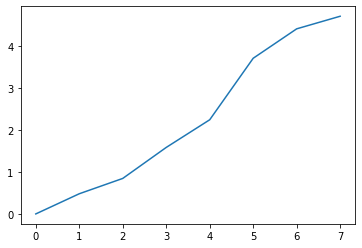

In [18]:
plt.plot(x, y)

In [22]:
def d_eff(i, j):
    eig_values = eig_all[0]
    eig_vectors = eig_all[1]
    
    d_eff_2 = 0
    for idx in range(len(eig_values)):
        eig_value = np.real(eig_values[idx])
        eig_vector = eig_vectors[:, idx]
        if np.isclose(eig_value, 0):
            continue
        d_eff_2 += (1/eig_value)*((eig_vector[i] - eig_vector[j])**2)

    return np.real(d_eff_2**(1/2))

In [23]:
er = []
for edge in edgelist:
    er.append(d_eff(idx_dict[edge[0]], idx_dict[edge[1]]))

In [24]:
er_dict = {edgelist[idx]:er[idx] for idx in range(len(edgelist))}

In [25]:
er_new_dict = {}
for edge in edgelist:
    er_new_dict[edge] = nx.resistance_distance(G, edge[0], edge[1])

er_new_dict

{(0, 1): 0.7857142857142851,
 (0, 2): 0.7857142857142854,
 (1, 3): 1.0000000000000002,
 (1, 4): 0.785714285714286,
 (2, 6): 0.7857142857142858,
 (4, 5): 0.6428571428571427,
 (4, 6): 0.5714285714285714,
 (6, 5): 0.6428571428571429,
 (5, 7): 1.0}

In [26]:
er_dict

{(0, 1): 0.8864052604279183,
 (0, 2): 0.8864052604279183,
 (1, 3): 0.9999999999999999,
 (1, 4): 0.8864052604279187,
 (2, 6): 0.8864052604279183,
 (4, 5): 0.801783725737273,
 (4, 6): 0.7559289460184544,
 (6, 5): 0.8017837257372729,
 (5, 7): 0.9999999999999997}

In [55]:
np.save("er.npy", er)

In [25]:
er = np.load("er.npy")

In [56]:
no_zero = [val for val in er if not np.isclose(val, 0)]

In [96]:
with open('t_dict.pkl', 'rb') as f:
    t_dict = pickle.load(f)

In [114]:
idx_d_dict = {}
for node in G:
    try:
        inst = G.nodes[node]['inst_name']
        idx_d_dict[node] = float(d_dict[inst])
    except:
        continue

In [145]:
idx_s_dict = {}
for node in nodelist:
    try:
        inst = G.nodes[node]['inst_name']
        idx_s_dict[node] = float(s_dict[inst])
    except:
        continue

In [84]:
selected_nodes = [n for n,v in G.nodes(data=True) if v['inst_name'] == 'clk']
selected_nodes

[13]

In [6]:
p_input = []
p_output = []
col = col_row[0]
row = col_row[1]

for node in col:
    if node not in row:
        p_input.append(node)

for node in row:
    if node not in col:
        p_output.append(node)
        
p_input = np.unique(np.array(p_input))
p_output = np.unique(np.array(p_output))

In [84]:
d_dict = {}
t_dict = {}
with open("report.txt") as f:
    while True:
        line = f.readline()
        if line == "---------------------------------------------------------\n":
            while True:
                line = f.readline()
                if line == "---------------------------------------------------------\n":
                    break
                inner_lst = line.split()
                if inner_lst[-3] == "data" and inner_lst[-2] == "arrival":
                    for n in range(13):
                        f.readline()
                    break
                delay = inner_lst[0]
                time = inner_lst[1]
                instance = inner_lst[3]
                if "/" in instance:
                    instance = instance.split("/")[0]
                d_dict[instance] = delay
                t_dict[instance] = time
        if line == "":
            break

In [85]:
d_dict

{'clk': '0.00',
 'network': '0.00',
 'rle_rz4_size_reg[3]': '0.00',
 'rle_rz4_g3370': '7.70',
 'rle_rz4_drc_bufs3495': '8.66',
 'rle_rz4_drc_bufs3403': '7.64',
 'rle_rz4_sizeo_reg[3]': '0.00',
 'rle_rz4_size_reg[2]': '0.00',
 'rle_rz4_g3356': '7.70',
 'rle_rz4_drc_bufs3508': '8.66',
 'rle_rz4_drc_bufs3414': '7.64',
 'rle_rz4_sizeo_reg[2]': '0.00',
 'rle_rz4_size_reg[1]': '0.00',
 'rle_rz4_g3368': '7.70',
 'rle_rz4_drc_bufs3497': '8.66',
 'rle_rz4_drc_bufs3405': '7.64',
 'rle_rz4_sizeo_reg[1]': '0.00',
 'rle_rz4_size_reg[0]': '0.00',
 'rle_rz4_g3357': '7.70',
 'rle_rz4_drc_bufs3507': '8.66',
 'rle_rz4_drc_bufs3415': '7.64',
 'rle_rz4_sizeo_reg[0]': '0.00',
 'rle_rz4_rlen_reg[3]': '0.00',
 'rle_rz4_g3361': '7.70',
 'rle_rz4_drc_bufs3504': '8.66',
 'rle_rz4_drc_bufs3412': '7.64',
 'rle_rz4_rleno_reg[3]': '0.00',
 'rle_rz4_rlen_reg[2]': '0.00',
 'rle_rz4_g3364': '7.70',
 'rle_rz4_drc_bufs3501': '8.66',
 'rle_rz4_drc_bufs3409': '7.64',
 'rle_rz4_rleno_reg[2]': '0.00',
 'rle_rz4_rlen_reg[1]'

In [ ]:
seq = [inst for inst in d_dict.keys() if float(d_dict[inst]) == 0.0]

s_dict = {}
for node in G.nodes:
    inst = G.nodes[node]['inst_name']
    inst = inst.replace("\\", "")
    if inst in seq:
        s_dict[inst] = 1
    else:
        s_dict[inst] = 0

In [143]:
with open('s_dict.pkl', 'rb') as f:
    s_dict = pickle.load(f)

In [61]:
with open('s_dict.pkl', 'wb') as f:
    pickle.dump(s_dict, f)

In [10]:
d_dict = {}
t_dict = {}
i = 0
remained = []
for node in G.nodes:
    inst = G.nodes[node]['inst_name']
    inst = inst.replace("\\", "")
    try:
        r = d_dict[inst]
        i += 1
    except:
        remained.append(inst)

In [165]:
len(G.nodes)

74947

In [162]:
d_dict = {}

In [172]:
i = 0
remained = []
for node in G.nodes:
    inst = G.nodes[node]['inst_name']
    inst = inst.replace("\\", "")
    try:
        r = d_dict[inst]
        i += 1
    except:
        remained.append(inst)

In [173]:
len(remained)

74947

In [174]:
with open("run_all.txt", "w") as f:
    s_line = []
    for inst in remained:
        line = f"report_checks -through {inst} >> {netlist_name}.txt\n"
        s_line.append(line)
    f.writelines(s_line)

In [175]:
filenames = ['sta_test.tcl', 'run_all.txt']
with open('final_sta_test.tcl', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

In [18]:
with open("extrareport.txt") as f:
    while True:
        line = f.readline()
        if line == "---------------------------------------------------------\n":
            while True:
                line = f.readline()
                if line == "---------------------------------------------------------\n":
                    break
                inner_lst = line.split()
                if inner_lst[-3] == "data" and inner_lst[-2] == "arrival":
                    for n in range(13):
                        f.readline()
                    break
                delay = inner_lst[0]
                time = inner_lst[1]
                instance = inner_lst[3][:-2]
                d_dict[instance] = delay
                t_dict[instance] = time
        if line == "":
            break

FileNotFoundError: [Errno 2] No such file or directory: 'report.txt'

In [14]:
netlist_name = "jpeg_300_off_low_GENUS" # The clock period

#read in the data
col_row = np.load(f"/home/zluo/output/{netlist_name}.npy")
col = col_row[0]
row = col_row[1]

#primary inputs and outputs nodes
p_input = []
p_output = []


for node in col:
    if node not in row:
        p_input.append(node)

for node in row:
    if node not in col:
        p_output.append(node)
        
p_input = np.unique(np.array(p_input))
p_output = np.unique(np.array(p_output))

In [27]:
all_data = []
for sn in sn_lst:
    all_dist_raw = []
    graph = Graph(edgs_d, n)
    p_input = [sn]
    for node in p_input: all_dist_raw.append(findLongestDistance(graph, node, n))

    # building the delay based dictionary
    delay_dict = all_dist_raw[0]
    delay_dict = {key: list(delay_dict[key]) for key in delay_dict.keys()}
    for dist in all_dist_raw[1:]:
        for key in dist.keys(): 
            val = dist[key]
            if key in delay_dict.keys():
                delay_dict[key] = delay_dict[key] + list(val)
            else:
                delay_dict[key] = list(val)

    delay_dict = {key: max(delay_dict[key]) for key in delay_dict.keys()}
    
    d_lst = []
    for delay in range(max(delay_dict.values()) + 1):
        delay_level_lst = []
        for node in delay_dict.keys():
            if delay_dict[node] == delay:
                delay_level_lst.append(node)

        if len(delay_level_lst) == 0:
            continue
        d_lst.append(delay_level_lst)
    
    r_lst = [len(lst) for lst in d_lst]
    l_lst = [idx for idx in range(len(d_lst))]
    
    all_data.append((r_lst, l_lst))

32524 450
52754 628
16900 396
23764 433
38509 580
39949 558
67723 452
24287 533
12000 574
51153 527


In [15]:
edgs = np.array([col, row]).T
all_dist_raw = []
edgs_d = [(lst[0], lst[1], 1) for lst in edgs] 
n = G.number_of_nodes()
graph = Graph(edgs_d, n)
for node in p_input: all_dist_raw.append(findLongestDistance(graph, node, n))

# building the delay based dictionary
delay_dict = all_dist_raw[0]
delay_dict = {key: list(delay_dict[key]) for key in delay_dict.keys()}
for dist in all_dist_raw[1:]:
    for key in dist.keys(): 
        val = dist[key]
        if key in delay_dict.keys():
            delay_dict[key] = delay_dict[key] + list(val)
        else:
            delay_dict[key] = list(val)

delay_dict = {key: max(delay_dict[key]) for key in delay_dict.keys()}

In [68]:
d_lst = []
for delay in range(max(delay_dict.values()) + 1):
    delay_level_lst = []
    for node in delay_dict.keys():
        if delay_dict[node] == delay:
            delay_level_lst.append(node)
    
    if len(delay_level_lst) == 0:
        continue
    d_lst.append(delay_level_lst)

In [69]:
len(d_lst)

774

In [34]:
r_lst = [len(lst) for lst in d_lst]
l_lst = [idx for idx in range(len(d_lst))]

In [37]:
all_data.append((r_lst, l_lst))

In [36]:
all_data = []

In [37]:
to_level = len(d_lst) # read the graph to a specific delay level

for edg in edgs:
    st.insert(edg)

for delay in range(to_level):
    nodes = d_lst[delay]
    for node in nodes:
        st.assign_filtration([node], delay)

In [38]:
dgms = st.extended_persistence()

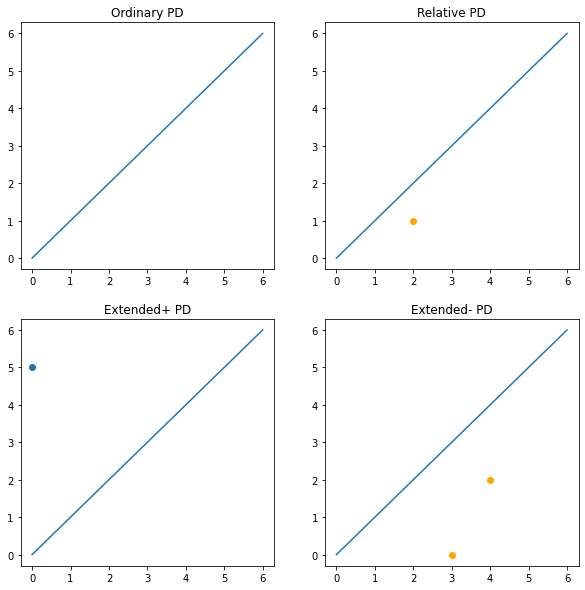

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].scatter([dgms[0][i][1][0] for i in range(len(dgms[0]))], [dgms[0][i][1][1] for i in range(len(dgms[0]))])
axs[0,0].plot([0, to_level],[0,to_level])
axs[0,0].set_title("Ordinary PD")
axs[0,1].scatter([dgms[1][i][1][0] for i in range(len(dgms[1]))], [dgms[1][i][1][1] for i in range(len(dgms[1]))], color="orange")
axs[0,1].plot([0,to_level],[0,to_level])
axs[0,1].set_title("Relative PD")
axs[1,0].scatter([dgms[2][i][1][0] for i in range(len(dgms[2]))], [dgms[2][i][1][1] for i in range(len(dgms[2]))])
axs[1,0].plot([0,to_level],[0,to_level])
axs[1,0].set_title("Extended+ PD")
axs[1,1].scatter([dgms[3][i][1][0] for i in range(len(dgms[3]))], [dgms[3][i][1][1] for i in range(len(dgms[3]))], color="orange")
axs[1,1].plot([0,to_level],[0,to_level])
axs[1,1].set_title("Extended- PD")
plt.show()

In [41]:
dgms

[[],
 [(1, (1.9999999999999996, 0.9999999999999998))],
 [(0, (0.0, 5.0))],
 [(1, (4.0, 1.9999999999999996)), (1, (3.0000000000000004, 0.0))]]

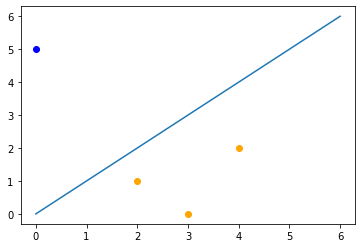

In [40]:
plt.scatter([dgms[0][i][1][0] for i in range(len(dgms[0]))], [dgms[0][i][1][1] for i in range(len(dgms[0]))], color="blue")
plt.scatter([dgms[2][i][1][0] for i in range(len(dgms[2]))], [dgms[2][i][1][1] for i in range(len(dgms[2]))], color="blue")
plt.scatter([dgms[1][i][1][0] for i in range(len(dgms[1]))], [dgms[1][i][1][1] for i in range(len(dgms[1]))], color="orange")
plt.scatter([dgms[3][i][1][0] for i in range(len(dgms[3]))], [dgms[3][i][1][1] for i in range(len(dgms[3]))], color="orange")
plt.plot([0, to_level],[0,to_level])

In [41]:
# building the delay based dictionary
s_all_raw = []
for v in p_input:
    s_all_raw.append(nx.shortest_path_length(G, v))    
    
delay_dict = all_raw[0]
delay_dict = {key: [delay_dict[key]] for key in delay_dict.keys()}
for dist in s_all_raw[1:]:
    for key in dist.keys(): 
        val = dist[key]
        if key in delay_dict.keys():
            delay_dict[key] = delay_dict[key] + [val]
        else:
            delay_dict[key] = [val]

delay_dict = {key: min(delay_dict[key]) for key in delay_dict.keys()}

d_lst = []
for delay in range(max(delay_dict.values())):
    delay_level_lst = []
    for node in delay_dict.keys():
        if delay_dict[node] == delay:
            delay_level_lst.append(node)
    
    if len(delay_level_lst) == 0:
        continue
    d_lst.append(delay_level_lst)

In [43]:
s_st = gd.SimplexTree()
to_level = len(s_d_lst) # read the graph to a specific delay level

for edg in edgs:
    s_st.insert(edg)

for delay in range(to_level):
    nodes = s_d_lst[delay]
    for node in nodes:
        s_st.assign_filtration([node], delay)
        
s_st.extend_filtration()
dgms = s_st.extended_persistence(min_persistence=1e-5)

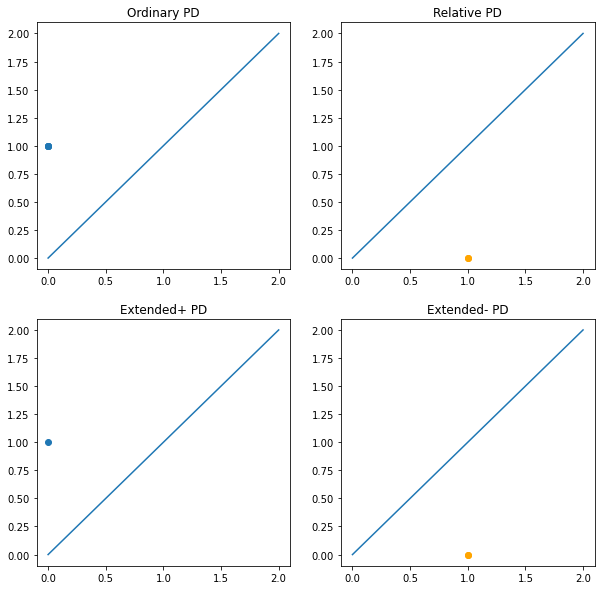

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0,0].scatter([dgms[0][i][1][0] for i in range(len(dgms[0]))], [dgms[0][i][1][1] for i in range(len(dgms[0]))])
axs[0,0].plot([0, to_level],[0,to_level])
axs[0,0].set_title("Ordinary PD")
axs[0,1].scatter([dgms[1][i][1][0] for i in range(len(dgms[1]))], [dgms[1][i][1][1] for i in range(len(dgms[1]))], color="orange")
axs[0,1].plot([0,to_level],[0,to_level])
axs[0,1].set_title("Relative PD")
axs[1,0].scatter([dgms[2][i][1][0] for i in range(len(dgms[2]))], [dgms[2][i][1][1] for i in range(len(dgms[2]))])
axs[1,0].plot([0,to_level],[0,to_level])
axs[1,0].set_title("Extended+ PD")
axs[1,1].scatter([dgms[3][i][1][0] for i in range(len(dgms[3]))], [dgms[3][i][1][1] for i in range(len(dgms[3]))], color="orange")
axs[1,1].plot([0,to_level],[0,to_level])
axs[1,1].set_title("Extended- PD")
plt.show()